We will conduct an analysis on the NHTSA recall dataset, which can be accessed at the following URL: https://www.nhtsa.gov/nhtsa-datasets-and-apis. This dataset encompasses comprehensive information regarding the characteristics of every automotive recall in the United States from 1963 up to the present day.

The primary objective of this notebook is to focus on the past decade's worth of data pertaining to US automotive recalls. Specifically, we will utilize this dataset to perform a basic estimation of TAM (Total Addressable Market), SAM (Serviceable Addressable Market), and SOM (Serviceable Obtainable Market) for Axion Ray within the US automotive recall sector.

Outlined below is a brief overview of the structure and contents of our dataset:

In [1]:
import pandas as pd
df = pd.read_csv('./data/Recalls_Data.csv')
df.head()

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Park Outside Advisory,Do Not Drive Advisory
0,05/25/2023,23V369000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Jaguar Land Rover North America, LLC",High-Voltage Battery May Overheat,ELECTRICAL SYSTEM,H441,Vehicle,6367.0,"Jaguar Land Rover North America, LLC (Jaguar) ...",The high-voltage battery overheating increases...,The battery energy control module software wil...,No,No
1,05/24/2023,23V364000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Grand Design RV, LLC",Missing Emergency Exit Window,STRUCTURE,910035,Vehicle,232.0,"Grand Design RV, LLC (Grand Design) is recalli...",A missing emergency exit window could prevent ...,Dealers will replace the window with an emerge...,No,No
2,05/24/2023,23V363000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"ST Engineering Hackney, Inc",Suspension Pivot Bolt Improperly Tightened,SUSPENSION,NR (Not Reported),Vehicle,120.0,"ST Engineering Hackney, Inc. (STE Hackney) is ...","Improperly tightened pivot bolts may fail, cau...","Dealers will inspect, and if necessary, tighte...",No,No
3,05/22/2023,23V362000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Nissan North America, Inc.",Corrosion in Brake Line May Cause Brake Fluid ...,"SERVICE BRAKES, HYDRAULIC",PC976,Vehicle,758.0,"Nissan North America, Inc. (Nissan) is recalli...",A brake fluid leak can reduce braking performa...,Dealers will inspect and replace the right-han...,No,No
4,05/19/2023,23V360000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Mercedes-Benz USA, LLC",Electronic Stability Control Software Error,ELECTRONIC STABILITY CONTROL,NR (Not Reported),Vehicle,7558.0,"Mercedes-Benz USA, LLC (MBUSA) is recalling ce...","Disabled vehicle dynamics control systems, inc...",Dealers will update the ESP control unit softw...,No,No


We will analyze each company's data to determine the total number of recalls, the potentially affected vehicles, and the estimated yearly expenditure on recalls.

In [2]:
df['Report Received Date'] = pd.to_datetime(df['Report Received Date'])
df = df[df['Report Received Date'] >= pd.to_datetime('2013-05-31')]

summary_df = df.groupby('Manufacturer').agg({
    'Manufacturer': 'count',
    'Potentially Affected': 'sum'
}).rename(columns={'Manufacturer': 'Total Recalls', 'Potentially Affected': 'Total Potentially Affected'})

summary_df['Yearly $ Amount'] = (summary_df['Total Potentially Affected'] * 500) / 10

pd.options.display.float_format = '{:,.0f}'.format
summary_df = summary_df.sort_values('Total Recalls', ascending=False)
summary_df

,Total Recalls,Total Potentially Affected,Yearly $ Amount
Manufacturer,,,
"Forest River, Inc.",444,"758,195","37,909,750"
Ford Motor Company,419,"54,915,123","2,745,756,150"
"Chrysler (FCA US, LLC)",399,"57,441,541","2,872,077,050"
"General Motors, LLC",346,"61,292,215","3,064,610,750"
"Daimler Trucks North America, LLC",337,"2,469,706","123,485,300"
...,...,...,...
"Jumping Jack, Inc.",1,300,"15,000"
"K&N Engineering, Inc.",1,"134,674","6,733,700"
"Keyline Sales, Inc.",1,277,"13,850"


Using the average cost of $500 per potentially affected vehicle, we can estimate the yearly cost of recalls for each company. The calculation is performed by multiplying the total number of potentially affected vehicles over the last 10 years by $500 and then dividing it by 10 years.

Remarkably, our analysis reveals that out of the vast pool of automotive companies in the United States, there are 1,043 unique entities that have encountered at least one recall within the past decade. This substantial number underscores the widespread impact of recalls within the industry and emphasizes the significance of addressing these issues effectively.

By proactively identifying defunct products and shortening the recall timeline by three months, businesses can significantly reduce their potential recall costs. Assuming a product was in production for 12 months, this approach would result in a 25% reduction in the number of units requiring recall.

To capitalize on these savings, it is reasonable to propose charging 3% of a company's total yearly expenditure on recalls prior to implementing Axion Ray. This fee would be justified by the anticipated benefits of early detection and expedited recalls.

As a result, we estimate the Total Addressable Market (TAM) for Axion Ray to be 3% of the average total yearly amount spent on recalls.

In [3]:
tam = summary_df['Yearly $ Amount'].sum() * 0.03
print('Estimated TAM:', "${:,.2f}".format(tam))

Estimated TAM: $760,752,985.50


For the estimation of the Serviceable Addressable Market (SAM), we will narrow down our focus to companies that exhibit a pattern of frequent recalls and significant expenditure. To meet this criteria, we will consider only those companies that have spent over $500,000 annually on recalls and have encountered a minimum of 10 recalls within the past 10 years.

By applying these stringent criteria, we aim to identify a subset of companies that not only allocate substantial resources to recalls but also have a recurrent history of facing recall challenges. This targeted approach allows us to prioritize the SAM and concentrate our efforts on companies with a higher likelihood of benefiting from the implementation of Axion Ray.

In [4]:
yearly_over500 = summary_df[summary_df['Yearly $ Amount'] >= 500000]
over500_over10 = yearly_over500[yearly_over500['Total Recalls'] >= 10]
over500_over10

,Total Recalls,Total Potentially Affected,Yearly $ Amount
Manufacturer,,,
"Forest River, Inc.",444,"758,195","37,909,750"
Ford Motor Company,419,"54,915,123","2,745,756,150"
"Chrysler (FCA US, LLC)",399,"57,441,541","2,872,077,050"
"General Motors, LLC",346,"61,292,215","3,064,610,750"
"Daimler Trucks North America, LLC",337,"2,469,706","123,485,300"
...,...,...,...
Hale Products Inc,10,"65,322","3,266,100"
Harbor Freight Tools,10,"3,455,570","172,778,500"
"Gulf States Toyota, Inc.",10,"24,623","1,231,150"


Based on the defined criteria, we have identified a select group of 96 companies that meet the profile of frequent recalls (at least 10 recalls over the past 10 years) and significant annual expenditure (over $500,000) on recalls. These companies represent our Serviceable Addressable Market (SAM).

To estimate the SAM, we will employ the same methodology as before, wherein we calculate 3% of the total yearly amount spent on recalls by these 96 companies. This approach ensures a consistent and proportional estimation of the SAM based on their recall expenditure. The resulting estimate is provided below.

In [5]:
sam = over500_over10['Yearly $ Amount'].sum() * 0.03
print('Estimated SAM:', "${:,.2f}".format(sam))

Estimated SAM: $686,528,097.00


To determine our Serviceable Obtainable Market (SOM), we will make an estimation that only a fraction of the identified SAM companies will actually purchase our product. In this case, we anticipate that 10 out of the 96 companies will become customers of Axion Ray.

To calculate the SOM, we will multiply the SAM by the ratio of 10 (representing the number of potential customers) to 96 (representing the total number of companies in the SAM). This approach allows us to project the subset of the SAM that we can realistically capture as our Serviceable Obtainable Market.

In [6]:
print('Estimated SOM:', "${:,.2f}".format(sam*(10/96)))

Estimated SOM: $71,513,343.44


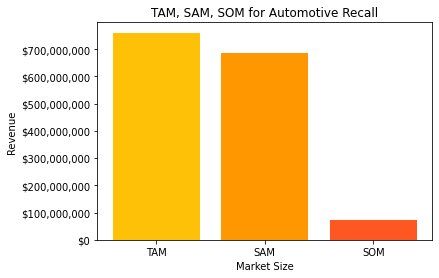

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define TAM, SAM, and SOM values
TAM = tam
SAM = sam
SOM = sam*(10/96)

# Create a bar chart
labels = ['TAM', 'SAM', 'SOM']
values = [TAM, SAM, SOM]
colors = ['#FFC107', '#FF9800', '#FF5722']

plt.bar(labels, values, color=colors)

# Format y-axis tick labels with commas
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add labels and title
plt.xlabel('Market Size')
plt.ylabel('Revenue')
plt.title('TAM, SAM, SOM for Automotive Recall')

# Display the graph
plt.show()